<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# type your code here
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# type your code here
df_rain=pd.read_csv('rainfall_prediction.csv')
df_rain.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.600000,1.000000,3.000000,14.225000,12.333333,82.000000,1028.100000,0
1,2,0.000000,7.200000,4.900000,23.075000,44.333333,69.500000,1015.650000,1
2,3,0.000000,0.600000,1.500000,10.175000,16.666667,87.000000,1026.450000,0
3,4,0.800000,2.400000,0.500000,19.000000,42.666667,89.000000,1010.050000,1
4,5,40.400000,3.000000,3.600000,18.725000,35.333333,81.500000,1005.600000,0


**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
#'Obs_Id' is insignificant so we can drop this

df_rain=df_rain.drop('Obs_Id',axis=1)
df_rain.head()

,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,3.600000,1.000000,3.000000,14.225000,12.333333,82.000000,1028.100000,0
1,0.000000,7.200000,4.900000,23.075000,44.333333,69.500000,1015.650000,1
2,0.000000,0.600000,1.500000,10.175000,16.666667,87.000000,1026.450000,0
3,0.800000,2.400000,0.500000,19.000000,42.666667,89.000000,1010.050000,1
4,40.400000,3.000000,3.600000,18.725000,35.333333,81.500000,1005.600000,0


In [10]:
df_rain.shape

(1520, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
df_rain[df_rain.duplicated()]

,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
142,0.000000,1.600000,6.900000,8.725000,18.666667,76.000000,1019.200000,0
143,0.000000,2.600000,2.700000,13.450000,22.666667,64.500000,1024.700000,0
144,0.000000,3.200000,3.100000,13.100000,28.333333,57.500000,1022.000000,0
145,0.000000,0.800000,5.600000,11.725000,12.666667,78.500000,1029.900000,0
146,5.600000,1.600000,11.500000,14.950000,21.333333,54.500000,1023.600000,0
147,0.000000,14.600000,12.800000,30.525000,26.000000,36.500000,1008.950000,0
148,9.800000,3.000000,10.700000,29.775000,22.666667,61.500000,1010.150000,0
149,0.000000,2.400000,4.200000,16.225000,25.333333,75.500000,1023.400000,1
150,0.200000,10.400000,5.800000,22.475000,28.333333,73.500000,1009.550000,1
151,0.000000,2.400000,4.400000,10.950000,24.333333,66.500000,1020.800000,0


In [11]:
df_rain.drop_duplicates(subset=None,keep='first',inplace=False)

,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,3.600000,1.000000,3.000000,14.225000,12.333333,82.000000,1028.100000,0
1,0.000000,7.200000,4.900000,23.075000,44.333333,69.500000,1015.650000,1
2,0.000000,0.600000,1.500000,10.175000,16.666667,87.000000,1026.450000,0
3,0.800000,2.400000,0.500000,19.000000,42.666667,89.000000,1010.050000,1
4,40.400000,3.000000,3.600000,18.725000,35.333333,81.500000,1005.600000,0
5,4.000000,3.000000,11.300000,15.125000,43.666667,59.500000,1016.800000,0
6,0.000000,7.000000,8.500000,24.325000,14.000000,57.000000,1011.000000,0
7,0.000000,11.000000,11.600000,19.900000,37.000000,32.000000,1012.250000,0
8,0.000000,6.800000,6.200000,20.125000,34.333333,34.500000,1008.200000,0
9,0.000000,5.000000,11.500000,22.775000,16.000000,21.000000,1030.950000,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
df_rain.skew()

Rainfall        6.936253
Evaporation     1.271085
Sunshine       -0.604139
Temp            0.093545
Wind_Speed      0.794314
Humidity       -0.355121
Pressure       -0.073358
RainTomorrow    1.575452
dtype: float64

In [14]:
Q1=df_rain.quantile(0.25)
Q3=df_rain.quantile(0.75)
IQR=Q3-Q1

df_rain = df_rain[~((df_rain< (Q1 - 1.5 * IQR)) | (df_rain > (Q3 + 1.5 * IQR))).any(axis=1)]
df_rain.shape

(802, 8)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
sc=StandardScaler()
scaled_data=sc.fit_transform(df_rain)

In [16]:
df_rain.shape

(802, 8)

In [17]:
df_rain.isnull().sum()

Rainfall        0
Evaporation     0
Sunshine        0
Temp            0
Wind_Speed      0
Humidity        0
Pressure        0
RainTomorrow    0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
x=df_rain.drop('RainTomorrow',axis=1)
y=df_rain.RainTomorrow
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [30]:
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
dist = DistanceMetric.get_metric('chebyshev')
dist.pairwise(x_train)

array([[ 0.        ,  3.175     , 17.5       , ..., 15.33333333,
        12.9       , 16.375     ],
       [ 3.175     ,  0.        , 18.        , ..., 17.33333333,
        15.1       , 19.55      ],
       [17.5       , 18.        ,  0.        , ..., 21.5       ,
        25.5       , 30.        ],
       ...,
       [15.33333333, 17.33333333, 21.5       , ...,  0.        ,
        19.66666666, 15.2       ],
       [12.9       , 15.1       , 25.5       , ..., 19.66666666,
         0.        ,  9.66666666],
       [16.375     , 19.55      , 30.        , ..., 15.2       ,
         9.66666666,  0.        ]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [43]:
para_tune={'n_neighbors' : [3, 5, 7, 9, 11, 13],
           'metric' : ['hamming','euclidean','manhattan','Chebyshev']}

knn=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn,
                     param_grid=para_tune,
                     cv=5,
                     scoring='accuracy')

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy')

In [44]:
knn_grid.best_params_

{'metric': 'hamming', 'n_neighbors': 3}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and find the ROC_AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
x=df_rain.drop('RainTomorrow',axis=1)
y=df_rain.RainTomorrow
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [39]:
# type your code here
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [40]:
y_train_pred = gb.predict(x_train)
y_test_pred = gb.predict(x_test)

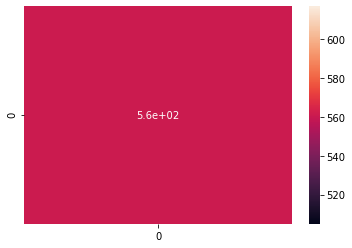

In [41]:
#train result
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True)
plt.show()

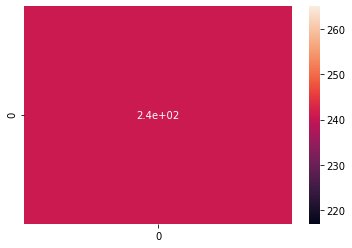

In [42]:
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)
plt.show()

In [ ]:
#will be no roc_auc score

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and  is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here
tune={'n_neighbors' :[19],
           'metric' : ['euclidean','manhattan']}

knn=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn,
                     param_grid=tune,
                     cv=5,
                     scoring='accuracy')

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [19]},
             scoring='accuracy')

In [48]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 19}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here
knn_1=KNeighborsClassifier(n_neighbors=19,metric='euclidean')
knn_1=knn_1.fit(x_train,y_train)
y_pred1=knn_1.predict(x_test)

In [50]:
confusion_matrix(y_test,y_pred1)

array([[241]], dtype=int64)